In [1]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import numpy as np

In [2]:
e_m = 5.97219000* 10**24
r_nd = 149597870691
v_nd=30000
dic_threebody = {'twoearth_sun':
                    {'rolaction' : np.array([[r_nd,0,0],[-r_nd*0.5,0,0],[0,0,0]]),
                     'velocity' : np.array([[0,0,v_nd],[0,0,-v_nd],[0,0.01*v_nd,0]]),
                     'mass' : np.array([e_m,e_m,333000*e_m]),
                     'G': 6.67e-11}
                } # อย่างเก็บไรเอามาใส่ตรงนี้

In [3]:
e_m

5.97219e+24

In [4]:
dic_threebody

{'twoearth_sun': {'rolaction': array([[ 1.49597871e+11,  0.00000000e+00,  0.00000000e+00],
         [-7.47989353e+10,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
  'velocity': array([[     0.,      0.,  30000.],
         [     0.,      0., -30000.],
         [     0.,    300.,      0.]]),
  'mass': array([5.97219000e+24, 5.97219000e+24, 1.98873927e+30]),
  'G': 6.67e-11}}

In [5]:
import scipy.integrate

r = dic_threebody['twoearth_sun']['rolaction']
v = dic_threebody['twoearth_sun']['velocity']
m = dic_threebody['twoearth_sun']['mass']
G = dic_threebody['twoearth_sun']['G']

class twobody:
    def __init__(self,m=None,r=None,v=None): #v,r is array 2D(3,3) m is array (3,)
        self.r = r
        self.v = v
        self.m = m

        self.params = np.concatenate((self.r,self.v))
        self.params = self.params.flatten()
        self.time_span = np.linspace(0,365*24*3600*2,500)

In [12]:
def ThreeBodyEqtion(y0,t,m=m,G=G):
    r1 = y0[:3]
    r2 = y0[3:6]
    r3 = y0[6:9]
    v1 = y0[9:12]
    v2 = y0[12:15]
    v3 = y0[15:18]
    r12 = np.linalg.norm(r2-r1) # คำนวนระยะห่างของดาว
    r13 = np.linalg.norm(r3-r1) # คำนวนระยะห่างของดาว
    r23 = np.linalg.norm(r3-r2) # คำนวนระยะห่างของดาว
    
    dv1bydt=G*m[1]*(r2-r1)/r12**3+G*m[2]*(r3-r1)/r13**3 # หาความเร่งจาก กฎข้อที่ 2 ของ นิวตัน
    dv2bydt=G*m[0]*(r1-r2)/r12**3+G*m[2]*(r3-r2)/r23**3 # หาความเร่งจาก กฎข้อที่ 2 ของ นิวตัน
    dv3bydt=G*m[0]*(r1-r3)/r13**3+G*m[1]*(r2-r3)/r23**3 # หาความเร่งจาก กฎข้อที่ 2 ของ นิวตัน

    dr1bydt=v1 # ความเร็วคือความเร็วเดิม
    dr2bydt=v2 # ความเร็วคือความเร็วเดิม
    dr3bydt=v3 # ความเร็วคือความเร็วเดิม

    r=np.concatenate((dr1bydt,dr2bydt))
    r=np.concatenate((r,dr3bydt))

    v=np.concatenate((dv1bydt,dv2bydt))
    v=np.concatenate((v,dv3bydt))

    output=np.concatenate((r,v))
    return output

In [13]:
model = twobody(r=r,v=v,m=m)
import scipy.integrate
three_body_sol = sci.integrate.odeint(ThreeBodyEqtion,model.params,model.time_span)

In [14]:
three_body_sol[:,9:12]

array([[ 0.00000000e+00,  0.00000000e+00,  3.00000000e+04],
       [-7.49103113e+02,  9.49434037e-02,  2.99905056e+04],
       [-1.49771061e+03,  3.79705352e-01,  2.99620294e+04],
       ...,
       [ 1.02632280e+04,  1.83899821e+01,  2.81609469e+04],
       [ 9.55866098e+03,  1.58820739e+01,  2.84117442e+04],
       [ 8.84779964e+03,  1.35526855e+01,  2.86446893e+04]])

In [15]:
three_body_sol[:,:3]

array([[ 1.49597871e+11,  0.00000000e+00,  0.00000000e+00],
       [ 1.49550526e+11,  4.00027648e+03,  3.79150378e+09],
       [ 1.49408523e+11,  3.19987604e+04,  7.58060773e+09],
       ...,
       [ 1.40418229e+11,  1.93655757e+10, -5.19938830e+10],
       [ 1.41671010e+11,  1.93677397e+10, -4.84183925e+10],
       [ 1.42834332e+11,  1.93695981e+10, -4.48123285e+10]])

In [16]:
r1_sol=three_body_sol[:,:3].T.reshape(3,-1)
r2_sol=three_body_sol[:,3:6].T.reshape(3,-1)
r3_sol=three_body_sol[:,6:9].T.reshape(3,-1)

<IPython.core.display.Javascript object>


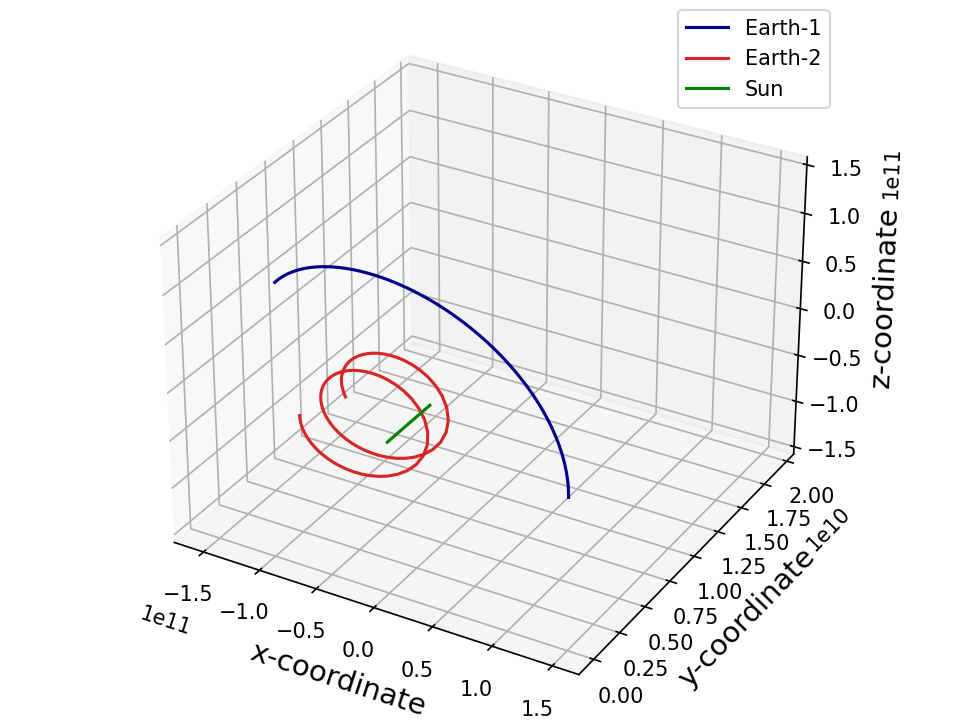

C:\Users\kritt\AppData\Local\Temp\ipykernel_24604\2991721401.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Visualization of orbits of stars in a two-body system\n')

In [17]:
%matplotlib notebook
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])
    return line
t = r1_sol[2]
x = r1_sol[0]
y = r1_sol[1]
#--------------------------------------------------------------------------------
t2 = r2_sol[2]
x2 = r2_sol[0]
y2 = r2_sol[1]
#------------------------------------------------------------------------------
t3 = r3_sol[2]
x3 = r3_sol[0]
y3 = r3_sol[1]

dataSet1 = np.array([x, y, t])
dataSet2 = np.array([x2, y2, t2])
dataSet3 = np.array([x3, y3, t3])
numdatapoint = len(r1_sol)
fig=plt.figure()
ax = Axes3D(fig)
line1 = ax.plot(r1_sol[0],r1_sol[1],r1_sol[2],color="darkblue",label='Earth-1')[0]
line2 = ax.plot(r2_sol[0],r2_sol[1],r2_sol[2],color="tab:red",label='Earth-2')[0]
line3 = ax.plot(r3_sol[0],r3_sol[1],r3_sol[2],color="green",label='Sun')[0]
ax.legend()
interval= 2
line_ani1 = animation.FuncAnimation(fig, func, frames=500, fargs=(dataSet1,line1), interval=interval, blit=True)
line_ani2 = animation.FuncAnimation(fig, func, frames=500, fargs=(dataSet2,line2), interval=interval, blit=True)
line_ani3 = animation.FuncAnimation(fig, func, frames=500, fargs=(dataSet3,line3), interval=interval, blit=True)

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)